In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
input_size = 6
output_size = 2

model = tf.keras.Sequential()

# input layer
model.add(keras.layers.Dense(1024, input_shape=(input_size,)))
model.add(keras.layers.ReLU())

# hidden layer
model.add(keras.layers.Dense(512))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(256))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(128))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(64))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(32))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(16))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(8))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(4))
model.add(keras.layers.ReLU())


# output layer
model.add(keras.layers.Dense(output_size))

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error')

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              7168      
_________________________________________________________________
re_lu_9 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_10 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
re_lu_11 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [12]:
f1 = open('/home/user/PycharmProjects/pythonProject/r_target_position.txt', 'r')
coordinates = f1.readlines()
coordinates = [x.strip("\n[]") for x in coordinates]
coordinates = [y.split(' ') for y in coordinates]


f2 = open('/home/user/PycharmProjects/pythonProject/cable_end_position.txt', 'r')
position = f2.readlines()
position = [x.strip("\n[]") for x in position]
position = [y.split(' ') for y in position]

positions = []
for i in range(7975):
    x = position[i][0]
    y = position[i][1]
    a = [x, y]
    positions.append(a)

x = np.array(coordinates, dtype=float)
y = np.array(positions, dtype=float)
print(len(x))
print(len(y))


# X_train, y_train = x, y
X_train, x_val, y_train, y_val = train_test_split(x, y, shuffle = True, random_state=42, test_size=0.4)
print("Train: ", len(X_train), len(y_train))
print("Val: ", len(x_val), len(y_val))

7975
7975
Train:  4785 4785
Val:  3190 3190


In [13]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data = (x_val, y_val))

Epoch 1/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.4030 - val_loss: 0.3922
Epoch 2/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3867 - val_loss: 0.3779
Epoch 3/1000
150/150 [==============================] - 1s 5ms/step - loss: 0.3737 - val_loss: 0.3652
Epoch 4/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3603 - val_loss: 0.3520
Epoch 5/1000
150/150 [==============================] - 1s 5ms/step - loss: 0.3467 - val_loss: 0.3382
Epoch 6/1000
150/150 [==============================] - 1s 5ms/step - loss: 0.3329 - val_loss: 0.3286
Epoch 7/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3196 - val_loss: 0.3115
Epoch 8/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.3067 - val_loss: 0.2999
Epoch 9/1000
150/150 [==============================] - 0s 3ms/step - loss: 0.2923 - val_loss: 0.2851
Epoch 10/1000
150/150 [==============================] - 1s 4ms/step - loss: 0.279

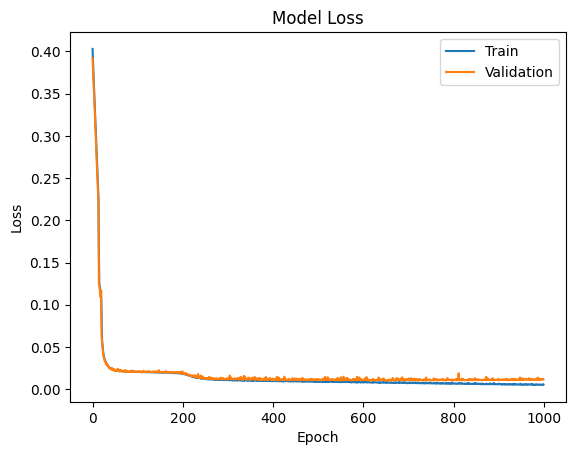

In [14]:
# Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [15]:
f3 = open('/home/user/PycharmProjects/pythonProject/polar_coordinate_trajectory_predict.txt', 'r')
p_coordinates = f3.readlines()
p_coordinates = [x.strip("\n[]") for x in p_coordinates]
p_coordinates = [y.split(' ') for y in p_coordinates]


f4 = open('/home/user/PycharmProjects/pythonProject/cable_end_position_predict.txt', 'r')
p_position = f4.readlines()
p_position = [x.strip("\n[]") for x in p_position]
p_position = [y.split(' ') for y in p_position]

p_positions = []
for i in range(54):
    px = p_position[i][0]
    py = p_position[i][1]
    b = [px, py]
    p_positions.append(b)

x_test = np.array(p_coordinates, dtype=float)
y_test = np.array(p_positions, dtype=float)
print(len(x_test))
print(len(y_test))

54
54


In [16]:
pred = model.predict(x_test)

In [17]:
import math
def dis(x1, y1, x2, y2):
    distance = math.sqrt(math.pow((x2-x1), 2) + math.pow((y2-y1), 2))
    return distance

per = []
rw = []
cw = []
r, c = 0, 0
for i in range(54):
    error = dis(pred[i][0], pred[i][1], y_test[i][0], y_test[i][1])
    per_error = error/0.53 * 100
    if dis(0, 0, y_test[i][0], y_test[i][1]) > 0.9781:
        cw.append(per_error)
        c = c + 1
    else:
        rw.append(per_error)
        r = r + 1

    per.append(per_error)

print("cable workspace:", c, "percentage:", sum(cw)/c, "min: ", min(cw), "max: ", max(cw))
print("robot workspace:", r, "percentage:", sum(rw)/r, "min: ", min(rw), "max: ", max(rw))
print("Total:", c + r, "percentage:", sum(per)/(c+r))

cable workspace: 18 percentage: 30.369885468135383 min:  1.1897254281096004 max:  95.42410365889296
robot workspace: 36 percentage: 16.19355657609212 min:  2.3715773279282617 max:  59.33227438260589
Total: 54 percentage: 20.918999540106537


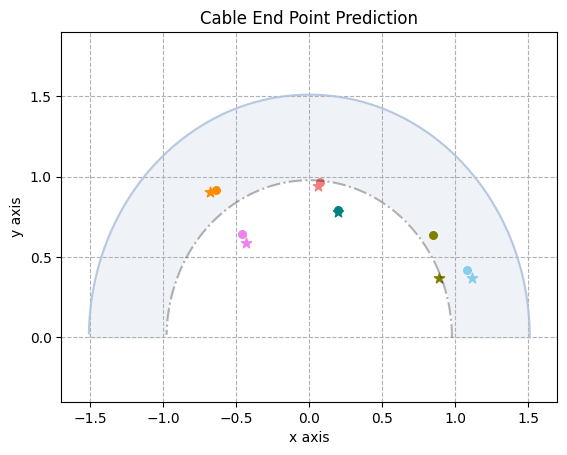

In [18]:
import matplotlib.pyplot as plt
import math

color = ['lightcoral', 'darkorange', 'olive', 'teal', 'violet', 'skyblue']

# Draw cricle
rx = []
ry = []
for theta in range(0, 180):
    rx.append(0 + 0.9781*math.cos(math.radians(theta)))
    ry.append(0 + 0.9781*math.sin(math.radians(theta)))

cx = []
cy = []
for theta in range(0, 180):
    cx.append(0 + 1.511*math.cos(math.radians(theta)))
    cy.append(0 + 1.511*math.sin(math.radians(theta)))

plt.xlim(-1.7, 1.7)
plt.ylim(-0.4, 1.9)
plt.grid(visible=True, linestyle='--')
plt.fill_between(cx, cy, color='lightsteelblue', alpha = 0.2)
plt.fill_between(rx, ry, color='white')
plt.plot(rx, ry, color='black', alpha = 0.3, linewidth = '1.5',  linestyle='-.')
plt.plot(cx, cy, color='lightsteelblue', alpha = 0.9, linewidth = '1.5')

pred = pred[10:17]
y_test = y_test[10:17]

for i in range(6):
    plt.scatter(y_test[i][0], y_test[i][1], color=color[i], s=60, marker="*")
    plt.scatter(pred[i][0], pred[i][1], color=color[i], s=30)

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('Cable End Point Prediction')
plt.show()
